In [6]:
!pip install numpy pandas scikit-learn matplotlib seaborn

In [7]:
import pandas as pd

# Load the datasets
moons_df = pd.read_csv('moons_dataset.csv')
blobs_df = pd.read_csv('blobs_dataset.csv')

# Display the first few rows of each dataset
print("Moons Dataset:")
print(moons_df.head())
print("\nBlobs Dataset:")
print(blobs_df.head())

Moons Dataset:
   Feature1  Feature2  Label
0  0.803926 -0.291407    1.0
1  2.314433 -0.122238    1.0
2 -0.280392  0.450938    1.0
3  0.789446  0.384060    0.0
4  1.186657 -0.511438    1.0

Blobs Dataset:
   Feature1  Feature2  Label
0 -7.430860 -7.899923    2.0
1 -7.912123 -7.341576    2.0
2 -1.522144  7.549274    0.0
3  4.378661  3.291702    1.0
4 -9.325377 -8.089813    2.0


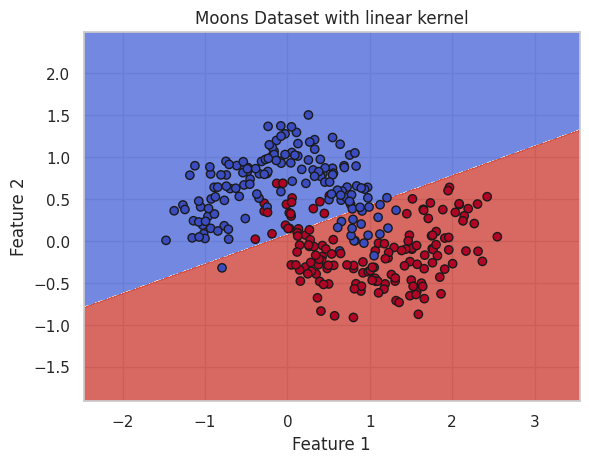

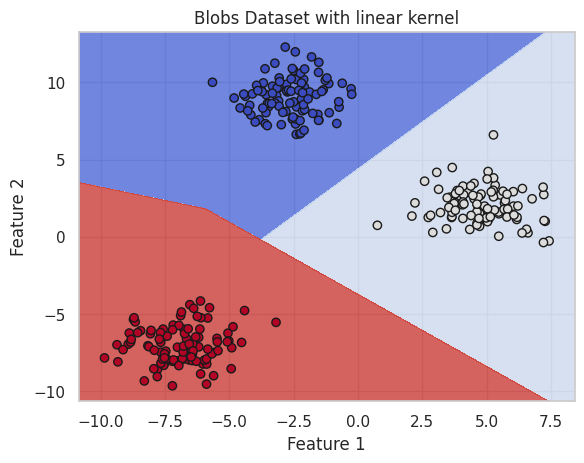

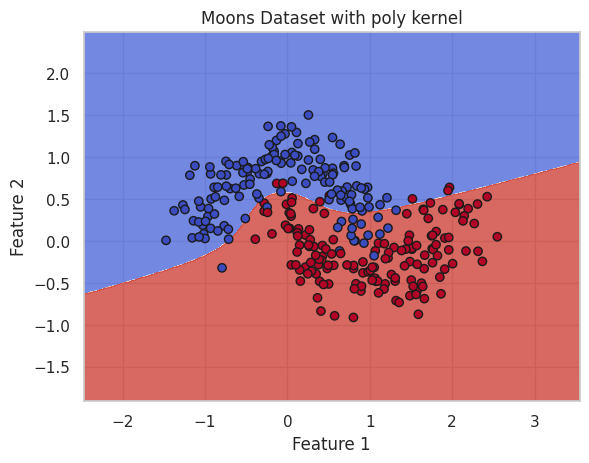

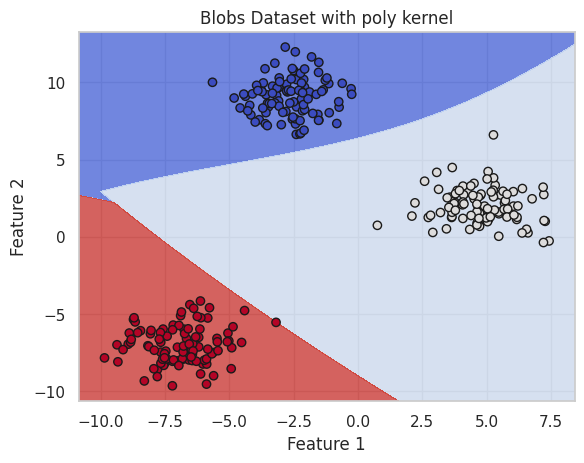

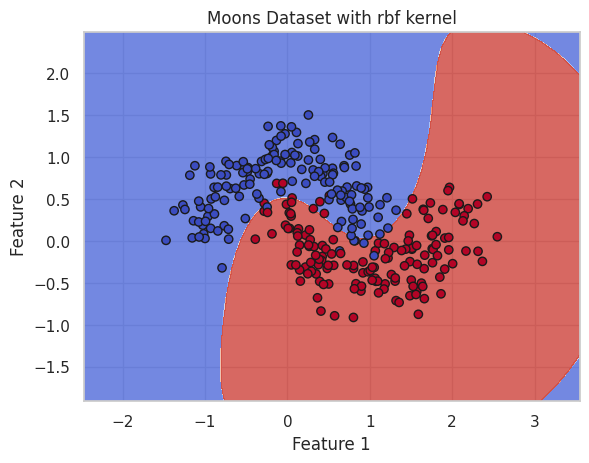

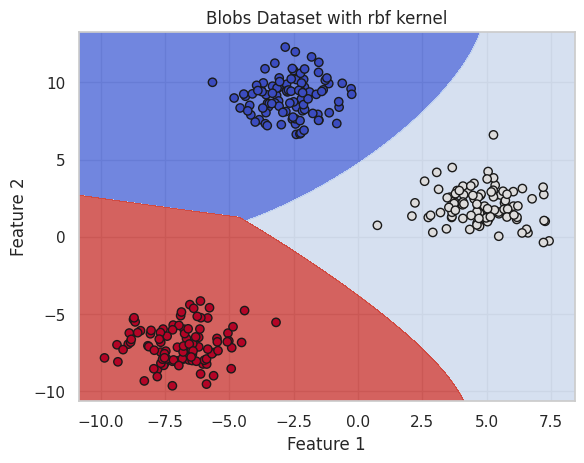

,Dataset,Kernel,Accuracy
0,Moons Dataset,linear,0.900000
1,Blobs Dataset,linear,1.000000
2,Moons Dataset,poly,0.911111
3,Blobs Dataset,poly,1.000000
4,Moons Dataset,rbf,0.966667
5,Blobs Dataset,rbf,1.000000


In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visualization
sns.set(style="whitegrid")

# Generate datasets
X_moons, y_moons = make_moons(n_samples=300, noise=0.2, random_state=42)
X_blobs, y_blobs = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.2)

# Split the datasets into training and testing sets
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=0.3, random_state=42)
X_train_blobs, X_test_blobs, y_train_blobs, y_test_blobs = train_test_split(X_blobs, y_blobs, test_size=0.3, random_state=42)

# Plotting decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Implement SVM with different kernels and visualize decision boundaries
kernels = ['linear', 'poly', 'rbf']
datasets = [
    (X_train_moons, X_test_moons, y_train_moons, y_test_moons, 'Moons Dataset'),
    (X_train_blobs, X_test_blobs, y_train_blobs, y_test_blobs, 'Blobs Dataset')
]

results = []

for kernel in kernels:
    for X_train, X_test, y_train, y_test, dataset_name in datasets:
        # Train the SVM model
        model = SVC(kernel=kernel, probability=True, random_state=42)
        model.fit(X_train, y_train)

        # Predict and evaluate the model
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append({
            'Dataset': dataset_name,
            'Kernel': kernel,
            'Accuracy': acc
        })

        # Plot decision boundary
        plot_decision_boundary(model, np.vstack((X_train, X_test)), np.hstack((y_train, y_test)),
                               f'{dataset_name} with {kernel} kernel')

# Convert results to a DataFrame and save to CSV
results_df = pd.DataFrame(results)
results_df.to_csv('svm_results.csv', index=False)

# Display results
results_df